In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt


In [2]:
crash_data = pd.read_csv("clean_crash_data.csv").drop(columns=["count"])
crash_data

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,report_id,local_case_id,agency_name,report_type,crash_date_time,collision_type,weather,light,traffic_control,driver_substance_abuse,...,speed_limit,driverless_vehicle,parked_vehicle,vehicle_year,vehicle_make,vehicle_model,equipment_problems,latitude,longitude,location
0,MCP93210035,190045952,Montgomery County Police,Property Damage Crash,09/25/2019 11:20:00 AM,SAME DIR REAR END,CLEAR,DAYLIGHT,NO CONTROLS,NONE DETECTED,...,25,No,No,2019,buick,ENCLAVE,NO MISUSE,39.044760,-77.052257,"(39.04476, -77.05225667)"
1,MCP93210035,190045952,Montgomery County Police,Property Damage Crash,09/25/2019 11:20:00 AM,SAME DIR REAR END,CLEAR,DAYLIGHT,NO CONTROLS,NONE DETECTED,...,25,No,No,2009,acura,4S,NO MISUSE,39.044760,-77.052257,"(39.04476, -77.05225667)"
2,MCP26390083,190045941,Montgomery County Police,Injury Crash,09/25/2019 09:58:00 AM,SAME DIR REAR END,CLEAR,DAYLIGHT,NO CONTROLS,NONE DETECTED,...,35,No,No,2018,toyota,CAMRY,NO MISUSE,39.090453,-77.050633,"(39.09045333, -77.05063333)"
3,MCP26390083,190045941,Montgomery County Police,Injury Crash,09/25/2019 09:58:00 AM,SAME DIR REAR END,CLEAR,DAYLIGHT,NO CONTROLS,NONE DETECTED,...,35,No,No,2015,honda,CRV,NO MISUSE,39.090453,-77.050633,"(39.09045333, -77.05063333)"
4,DD56340027,190045937,Rockville Police Departme,Injury Crash,09/25/2019 09:50:00 AM,HEAD ON LEFT TURN,CLEAR,DAYLIGHT,TRAFFIC SIGNAL,NaN,...,45,No,No,2016,honda,TK,NO MISUSE,39.073533,-77.111992,"(39.073533, -77.11199183)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97683,MCP2783000G,15000025,Montgomery County Police,Injury Crash,01/01/2015 01:14:00 AM,HEAD ON,CLEAR,DARK LIGHTS ON,TRAFFIC SIGNAL,ALCOHOL PRESENT,...,40,No,No,1999,ford,PICK UP,NO MISUSE,39.096217,-77.109803,"(39.09621667, -77.10980333)"
97684,MCP2686000D,15000017,Montgomery County Police,Property Damage Crash,01/01/2015 01:10:00 AM,SAME DIR REAR END,NaN,DARK LIGHTS ON,TRAFFIC SIGNAL,ALCOHOL PRESENT,...,40,No,No,2010,ford,FOCUS,NO MISUSE,39.196610,-77.265547,"(39.19661, -77.26554667)"
97685,MCP2686000D,15000017,Montgomery County Police,Property Damage Crash,01/01/2015 01:10:00 AM,SAME DIR REAR END,NaN,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,...,40,No,No,2007,jeep,COMPASS,NO MISUSE,39.196610,-77.265547,"(39.19661, -77.26554667)"
97686,MCP11520005,15000008,Montgomery County Police,Property Damage Crash,01/01/2015 12:30:00 AM,SAME DIR REAR END,CLEAR,DARK LIGHTS ON,TRAFFIC SIGNAL,NaN,...,35,No,No,1993,buick,4S,NO MISUSE,39.022001,-77.102673,"(39.02200107, -77.10267305)"


In [3]:
# Classify injuries as binary, injured vs. not injured
mask = crash_data.injury_severity != "NO APPARENT INJURY"
column_name = "injury_severity"
crash_data.loc[mask, column_name] = "INJURY"

# Insert column with unique ids
crash_data['unique_id'] = range(1, len(crash_data) + 1)

In [4]:
# Check vehicle make count
crash_data.groupby("vehicle_make")[["unique_id"]].nunique().\
sort_values(by=["unique_id"], ascending=False).head(50)

,unique_id
vehicle_make,
toyota,18653
honda,13938
ford,10080
nissan,6730
chevrolet,6455
hyundai,3511
dodge,3269
lexus,2254
acura,2243


In [4]:
# Injury vs. non-injury count
crash_data.groupby("injury_severity")[["unique_id"]].nunique()

,unique_id
injury_severity,
INJURY,18300
NO APPARENT INJURY,79388


In [6]:
# Create columns for year, month, day, and hour
crash_data["year"] = pd.DatetimeIndex(crash_data["crash_date_time"]).year
crash_data["month"] = pd.DatetimeIndex(crash_data["crash_date_time"]).month
crash_data["day"] = pd.DatetimeIndex(crash_data["crash_date_time"]).day
crash_data["hour"] = pd.DatetimeIndex(crash_data["crash_date_time"]).hour

In [7]:
# Potential features
X_potentials = pd.get_dummies(
crash_data[[
    "driver_distracted_by", "vehicle_dmg_extent", "vehicle_year",
    "collision_type", "driver_substance_abuse", "light", "weather",
    "speed_limit", "year", "month", "day", "hour", "vehicle_make",
    "injury_severity", "traffic_control", "longitude", "latitude"
]]).drop(columns=[
    "vehicle_dmg_extent_UNKNOWN",
    "driver_substance_abuse_UNKNOWN",
    "driver_distracted_by_UNKNOWN"
])

In [11]:
# Define y
y = pd.get_dummies(crash_data[["driver_at_fault"]])[["driver_at_fault_Yes"]]\
    .values.ravel()
y

array([0, 1, 0, ..., 0, 0, 1], dtype=uint8)

In [12]:
# Use feature selection functions to pick best features
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=8)
selector.fit(X_potentials, y)
cols = selector.get_support(indices=True)
X = X_potentials.iloc[:,cols]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_test

,speed_limit,driver_distracted_by_INATTENTIVE OR LOST IN THOUGHT,driver_distracted_by_LOOKED BUT DID NOT SEE,driver_distracted_by_NOT DISTRACTED,collision_type_SINGLE VEHICLE,driver_substance_abuse_ALCOHOL PRESENT,driver_substance_abuse_NONE DETECTED,injury_severity_INJURY
61992,25,0,0,1,0,0,1,0
3431,25,0,1,0,0,0,1,0
66181,40,0,0,0,0,0,1,0
69824,40,0,0,0,0,0,0,0
69827,55,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
86205,35,0,0,1,0,0,1,1
47001,30,0,0,1,0,1,0,1
72026,10,0,0,0,0,0,0,0
40399,25,0,0,0,0,0,1,0


In [14]:
# Train model on Linear SVC framework
from sklearn.svm import LinearSVC
model = LinearSVC(random_state=1, max_iter=1200000)
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1200000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

accuracy: 0.796945377118991
precision: 0.6971511940413115
balanced acc: 0.8120900000077441
mean sq error: 0.20305462288100892


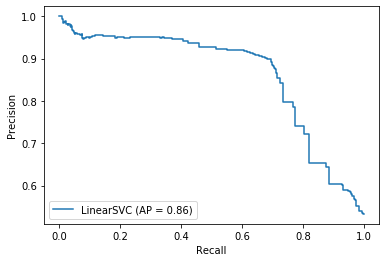

In [16]:
# Use various metrics to assess model
from sklearn.metrics import (
    precision_score as ps,
    mean_squared_error as mse,
    precision_recall_curve as prc,
    balanced_accuracy_score as bas,
    plot_precision_recall_curve as pprc
)
model.score(X_test, y_test)
print(f"accuracy: {model.score(X_test, y_test)}")
print(f"precision: {ps(model.predict(X_test), y_test)}")
print(f"balanced acc: {bas(model.predict(X_test), y_test)}")
print(f"mean sq error: {mse(model.predict(X_test), y_test)}")

# Plot and save precision-recall curve
disp = pprc(model, X_test, y_test)
disp.figure_.savefig("precision_recall.png", dpi=300)
disp

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[10384,  1015],
       [ 3944,  9079]])